## Binary search on 2D array

### Find rows with maximum number of 1's
Consider a matrix with 0's and 1's  
[0 0 1 1 1]  
[0 0 0 0 0]  
[0 1 1 1 1]  
[0 0 0 0 0]  
[0 1 1 1 1]  

Every row of the matrix is sorted. We have to find out which row contains the maximum number of 1's, if two contains same number of 1's return the least index.

0 - [0 0 1 1 1] - 3 1's  
1 - [0 0 0 0 0] - 0 1's  
2 - [0 1 1 1 1] - 4 1's  
3 - [0 0 0 0 0] - 0 1's  
4 - [0 1 1 1 1] - 4 1's  

Index 2 and 4 have max 1's so we them, 2 is smaller so we take 2 as the answer

In [8]:
# Linear search
mat = [[0,0,1,1,1],
        [0,0,0,0,0],
        [0,1,1,1,1],
        [0,0,0,0,0],
        [0,1,1,1,1]]

ind = -1
max1s = -1
for i in range(len(mat)):
    rowcnt = 0
    for j in range(len(mat[i])):
        rowcnt += mat[i][j]
    if rowcnt > max1s:
        max1s = rowcnt
        ind = i
print(ind, max1s) 
# Time complexity: O(nxm)
# Space complexity: O(1)

2 4


Consider one particular row of the matrix  
[0,0,1,1,1]  
We have to find out which is the first 1. Here the first 1 is at index 2, size of row is 5. To number of 1's is 5-2 = 3

We can find first 1 by lower bound

In [11]:
# Using binary search on each row
ind = -1
max1s = -1
for i in range(len(mat)):
    ind1 = len(mat[i])
    low = 0
    high = len(mat[i])-1
    while low<=high:
        mid = int((low+high)/2)
        if mat[i][mid] >= 1:
            ind1 = mid
            high = mid-1
        else:
            low = mid+1
    
    rowcnt = len(mat[i]) - ind1
    if rowcnt > max1s:
        max1s = rowcnt
        ind = i
print(ind, max1s)
# Time complexity: O(n x log(m))
# Space complexity: O(1)


2 4


### Search in 2D array
Consider the matrix:  
[[3, 4, 7, 9],  
[12, 13, 16, 18],  
[20, 21, 23, 29]]  

target = 23  
We have to find out whether the target is in the matrix or not

In [2]:
# linear search
mat = [[3, 4, 7, 9],
       [12, 13, 16, 18],
       [20, 21, 23, 29]]
target = 23
def searchin2d(mat, target):
    for i in range(len(mat)):
        for j in range(len(mat[i])):
            if mat[i][j] == target:
                return True
    return False

print(searchin2d(mat, target))
# Time complexity: O(n x m)
# Space complexity: O(1)

True


Consider each row one at a time and check if the target lies between first element of the row and last element of the row

If we see, the matrix is sorted in itself,We flatten the 2D matrix into 1D

[[3, 4, 7, 9],  
[12, 13, 16, 18],  
[20, 21, 23, 29]]    

[3, 4, 7, 9, 12, 13, 16, 18, 20, 21, 23, 29]  
The starting index is 0 and ending is 11

To map 1D coordinate to 2D coordinate  

ind -> row = ind/m  
ind -> col = ind%m

Consider the matrix with 1D coordinates  
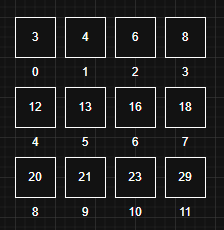

We can see that first element of each is multiple of 4(no. of columns = m), if we divide the ind by the number of columns we will get the row number and reminder will give which column.

In [ ]:
# binary search
def binary2d(mat, target):
    n = len(mat)
    m = len(mat[0])
    low = 0
    high = (n*m) - 1
    while low<=high:
        mid = int((low+high)/2)
        row = int(mid/m)
        col = int(mid%m)
        if mat[row][col] == target:
            return True
        elif mat[row][col] < target:
            low = mid+1
        else:
            high = mid-1
    return False

print(binary2d(mat, target))
# Time complexity: O(log n x m)
# Space complexity: O(1)

True
